In [397]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

### Introduction 

As per the Centre for Disease Control and Prevention website a stroke, sometimes also known as brain attack, occurs when something blocks blood supply to part of the brain or when a blood vessel in the brain bursts. Which can result into permanent or lasting damage into the brain, sometimes it also causes long-term disability, or even death. According to the World Health Organization stroke is 2nd leading cause of death globally, responsible for around 11% of total deaths. 

Dataset: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In this project we are going to analyze and predict weather a patient is likely to get a stroke or not based on following input parameters: age, gender, hypertension, heart disease, ever married, work type, residence type, average glucose level, bmi, smoking status. 


In [398]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Data Preparation

In [400]:
# Checking unique values and their count for each feature
for i in df.columns:
    print(df[i].value_counts())
    print("-----------------------")

9046     1
22194    1
15104    1
28315    1
56996    1
        ..
897      1
4789     1
5686     1
37451    1
44679    1
Name: id, Length: 5110, dtype: int64
-----------------------
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
-----------------------
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64
-----------------------
0    4612
1     498
Name: hypertension, dtype: int64
-----------------------
0    4834
1     276
Name: heart_disease, dtype: int64
-----------------------
Yes    3353
No     1757
Name: ever_married, dtype: int64
-----------------------
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
-----------------------
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
-----------------------
93.88     6
91.68     5
91.85  

- First thing we can notice here is our target variable 'stroke' is higly unbalanced with 4861 records of patients with non-stroke and 249 records of patients with storke. 
- We also noticed that we have only 1 record of gender = Other in the dataset which can be considerd as outlier for given dataset

In [401]:
# droping record gender = Other
df = df[df['gender']!='Other']

In [402]:
# Looking for null values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [403]:
# Calculating mean of bmi for records with stroke
bmi_mean_stroke = df[df['stroke'] == 1]['bmi'].mean()
bmi_mean_stroke

30.471291866028707

In [404]:
# Calculating mean of bmi for records with non-stroke
bmi_mean_no_stroke = df[df['stroke'] == 0]['bmi'].mean()
bmi_mean_no_stroke

28.82443072994254

In [405]:
# Replacing null values with the mean
df.loc[df['stroke']==1,'bmi'] = df.loc[df['stroke']==1, 'bmi'].fillna(bmi_mean_stroke)
df.loc[df['stroke']==0,'bmi'] = df.loc[df['stroke']==0, 'bmi'].fillna(bmi_mean_no_stroke)

In [406]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.471292,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.824431,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


### EDA

In [407]:
# Calculating correlation
corr = df.corr()

Here I am calculating correlation to check the relationship between our input feature and the target feature

- Calulating correlation using the above method will only calculate for continuous features for categorical features we have to use chi-square method 

<AxesSubplot:>

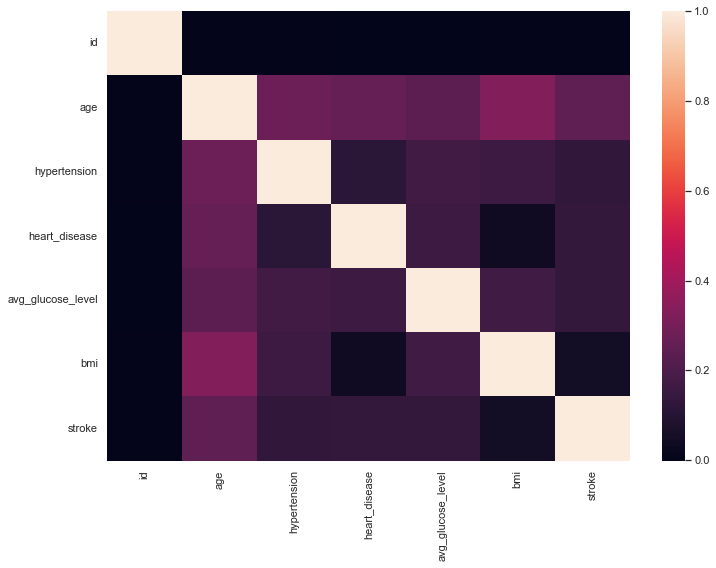

In [408]:
sns.heatmap(corr)

From the above graph we can infer apart from feature 'bmi' all the other continuous features are somewhat correlated to the 'stroke' where 'bmi' seems to have no linear correlation with 'stroke'

##### Chi-Square test

In [409]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.471292,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.824431,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [410]:
df_stroke = df.copy()
df_stroke['stroke'].replace(1, 'stroke', inplace = True)
df_stroke['stroke'].replace(0, 'non-stroke', inplace = True)

In [411]:
# preparing data for chi-square test
import scipy.stats as ss

df_cat = pd.DataFrame(data = df_stroke.dtypes, columns = 
                                         ['a']).reset_index()

cat_var = list(df_cat['index'].loc[df_cat['a'] == 'object'])
cat_var

df_cat = df_stroke[cat_var]
df_cat.head()

,gender,ever_married,work_type,Residence_type,smoking_status,stroke
0,Male,Yes,Private,Urban,formerly smoked,stroke
1,Female,Yes,Self-employed,Rural,never smoked,stroke
2,Male,Yes,Private,Rural,never smoked,stroke
3,Female,Yes,Private,Urban,smokes,stroke
4,Female,Yes,Self-employed,Rural,never smoked,stroke


In [412]:
from itertools import product
cat_var1 = ('gender', 'ever_married', 'work_type','Residence_type','smoking_status', 'stroke')
cat_var2 = ('gender', 'ever_married', 'work_type','Residence_type','smoking_status', 'stroke')

cat_var_prod = list(product(cat_var1,cat_var2, repeat = 1))
cat_var_prod

[('gender', 'gender'),
 ('gender', 'ever_married'),
 ('gender', 'work_type'),
 ('gender', 'Residence_type'),
 ('gender', 'smoking_status'),
 ('gender', 'stroke'),
 ('ever_married', 'gender'),
 ('ever_married', 'ever_married'),
 ('ever_married', 'work_type'),
 ('ever_married', 'Residence_type'),
 ('ever_married', 'smoking_status'),
 ('ever_married', 'stroke'),
 ('work_type', 'gender'),
 ('work_type', 'ever_married'),
 ('work_type', 'work_type'),
 ('work_type', 'Residence_type'),
 ('work_type', 'smoking_status'),
 ('work_type', 'stroke'),
 ('Residence_type', 'gender'),
 ('Residence_type', 'ever_married'),
 ('Residence_type', 'work_type'),
 ('Residence_type', 'Residence_type'),
 ('Residence_type', 'smoking_status'),
 ('Residence_type', 'stroke'),
 ('smoking_status', 'gender'),
 ('smoking_status', 'ever_married'),
 ('smoking_status', 'work_type'),
 ('smoking_status', 'Residence_type'),
 ('smoking_status', 'smoking_status'),
 ('smoking_status', 'stroke'),
 ('stroke', 'gender'),
 ('stroke', 

In [413]:
result = []
for i in cat_var_prod:
    if i[0] != i[1]:
        result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(
                            df_cat[i[0]], df_cat[i[1]])))[1]))

In [414]:
result

[('gender', 'ever_married', 0.0334487647282252),
 ('gender', 'work_type', 1.431607380960033e-08),
 ('gender', 'Residence_type', 0.6833170950912254),
 ('gender', 'smoking_status', 2.2731242721573073e-11),
 ('gender', 'stroke', 0.5598277580669416),
 ('ever_married', 'gender', 0.03344876472822514),
 ('ever_married', 'work_type', 0.0),
 ('ever_married', 'Residence_type', 0.6902334214722691),
 ('ever_married', 'smoking_status', 8.54686655490199e-130),
 ('ever_married', 'stroke', 1.6862856191673454e-14),
 ('work_type', 'gender', 1.4316073809600358e-08),
 ('work_type', 'ever_married', 0.0),
 ('work_type', 'Residence_type', 0.3283480738462158),
 ('work_type', 'smoking_status', 3.396344993475793e-290),
 ('work_type', 'stroke', 5.40903546949726e-10),
 ('Residence_type', 'gender', 0.6833170950912254),
 ('Residence_type', 'ever_married', 0.6902334214722691),
 ('Residence_type', 'work_type', 0.3283480738462158),
 ('Residence_type', 'smoking_status', 0.1424984756229151),
 ('Residence_type', 'stroke'

In [415]:
chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2', 
                                                       'coeff'])
chi_test_output

,var1,var2,coeff
0,gender,ever_married,3.344876e-02
1,gender,work_type,1.431607e-08
2,gender,Residence_type,6.833171e-01
3,gender,smoking_status,2.273124e-11
4,gender,stroke,5.598278e-01
5,ever_married,gender,3.344876e-02
6,ever_married,work_type,0.000000e+00
7,ever_married,Residence_type,6.902334e-01
8,ever_married,smoking_status,8.546867e-130
9,ever_married,stroke,1.686286e-14


The result of chi-square test stats that there exists a relationship between two variables if p value <=0.5. So in our case apart from residence_type all the other features have p value less <= 0.5. so ther is relationship between gender and stroke, ever_married and stroke, work_type and stroke, smoking status and stroke.

<AxesSubplot:xlabel='age', ylabel='Count'>

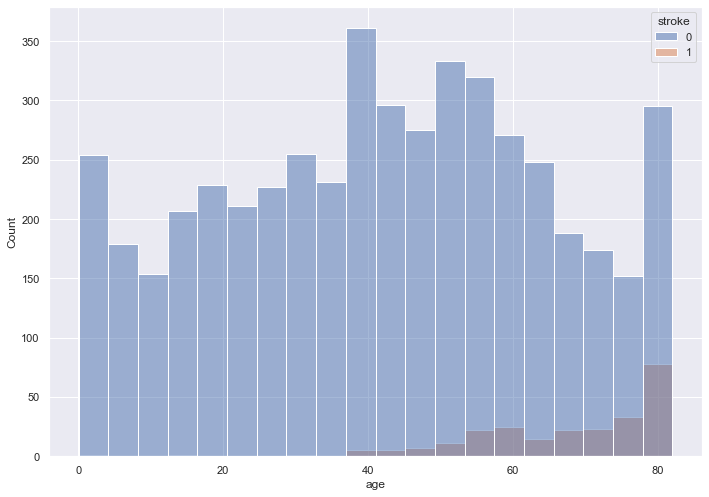

In [416]:
sns.histplot(data = df, x = 'age', hue = 'stroke')

<AxesSubplot:xlabel='heart_disease', ylabel='Count'>

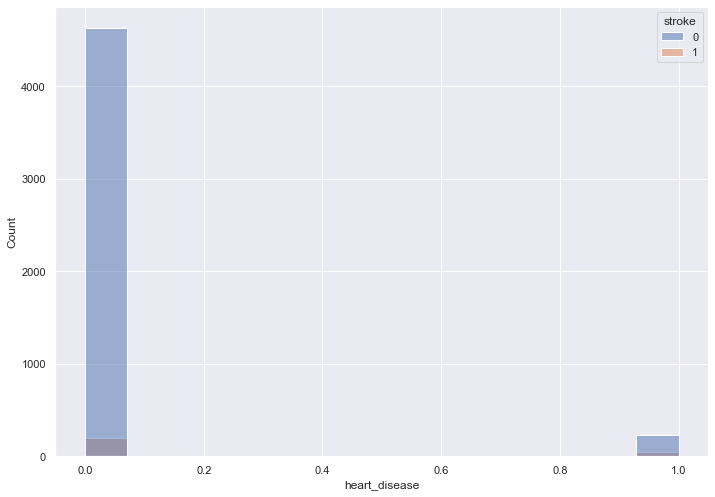

In [417]:
sns.histplot(data = df, x = 'heart_disease', hue = 'stroke')

<AxesSubplot:xlabel='hypertension', ylabel='Count'>

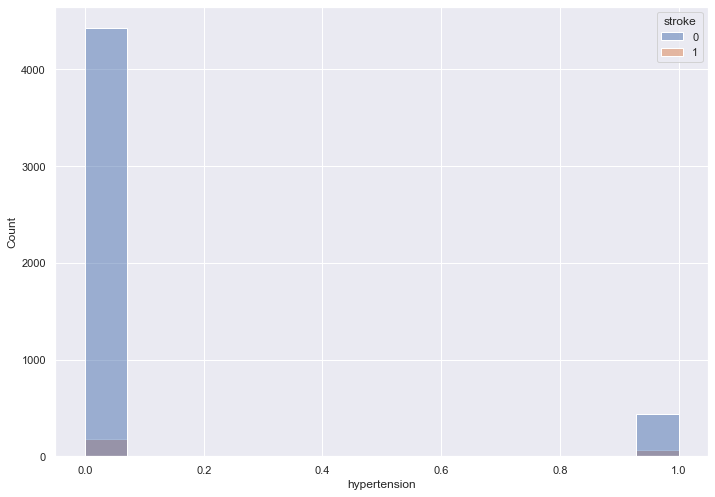

In [418]:
sns.histplot(data = df, x = 'hypertension', hue = 'stroke')

<AxesSubplot:xlabel='smoking_status', ylabel='Count'>

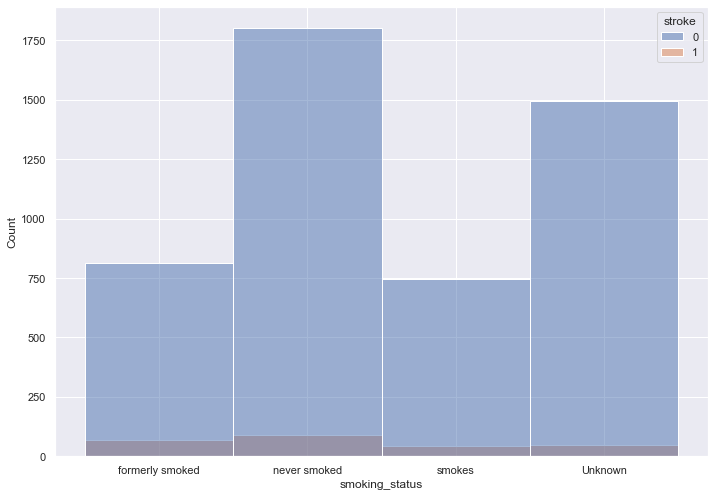

In [419]:
sns.histplot(data = df, x = 'smoking_status', hue = 'stroke')

In [420]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                5109 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 647.9+ KB


In [421]:
# Converting all cat features to int
df['gender'] = df['gender'].map({
    'Male' : int(0),
    'Female' : int(1)
})

df['ever_married'] = df['ever_married'].map({
    'Yes': int(1),
    'No' : int(0)
})

df['work_type'] = df['work_type'].map({
    'Private':int(3), 
    'Self-employed':int(4),
    'Govt_job':int(2), 
    'children':int(1), 
    'Never_worked':int(0)
})

df['Residence_type'] = df['Residence_type'].map({
    'Urban':int(2), 
    'Rural':int(1)
})

# smoking_status
df['smoking_status'] = df['smoking_status'].map({
    'formerly smoked':int(1),
    'never smoked':int(2), 
    'smokes':int(3),
    'Unknown':int(0)
})

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   int64  
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   int64  
 6   work_type          5109 non-null   int64  
 7   Residence_type     5109 non-null   int64  
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                5109 non-null   float64
 10  smoking_status     5109 non-null   int64  
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 647.9 KB


For this project as we have already observed that our target feature is highly unbalanced. To solve this problem I will be experimenting with three differnet sampling methods.
- Sampling using SMOTE
- Oversampling
- Undersamplig

#### ML Algorithm Selection
For this project I will be creating DecisionTreeClassifier and XGBoost Models, Reason behind choosing this models is both of them are tree based classifier which known to work great with unbalanced dataset. 

### Sampling using SMOTE 

In [359]:
X = df.drop(['stroke'],axis = 1)
y = df.pop('stroke')

In [360]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X, y,test_size=0.30,random_state=1)

In [331]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [301]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [203]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Pre defining weights since our dataset is unbalanced
weights = {0:492, 1:284315}
DT_model = DecisionTreeClassifier(random_state=0, class_weight = weights)

# fit the model
DT_model.fit(X_train,y_train)

# model score
predict_train_DT = DT_model.predict(X_train)
predict_test_DT = DT_model.predict(X_test)

# accuracy score
DT_train_score = DT_model.score(X_train,y_train)
DT_test_score = DT_model.score(X_test,y_test)

# f1-score
DT_f1_score = metrics.f1_score(y_test, predict_test_DT)

print('Accuracy on Train set',DT_train_score)
print('Accuracy on Test set',DT_test_score)
print('F1-score on Test set:',DT_f1_score)
print('\n')
print(metrics.classification_report(y_test, predict_test_DT))

Accuracy on Train set 1.0
Accuracy on Test set 0.8747553816046967
F1-score on Test set: 0.19999999999999996


              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1450
           1       0.15      0.29      0.20        83

    accuracy                           0.87      1533
   macro avg       0.55      0.60      0.57      1533
weighted avg       0.91      0.87      0.89      1533



#### What can we infer from above analysis
- Using Decision-Tree Classifier we have gotten a goog accuracy for training set but moderated accuracy in testing set which meaning model is overfitting.
- Precision and Recall for class '0' turned out to be great but performed very poorly for class '1'

### Oversampling

In [388]:
from sklearn.utils import resample

X = df.drop(['stroke'],axis = 1)
y = df.pop('stroke')

In [389]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X, y,test_size=0.30,random_state=1)

In [390]:
X_new = pd.concat([X_train, y_train], axis = 1)

not_stroke = X_new[X_new.stroke == 0]
stoke = X_new[X_new.stroke == 1]

In [391]:
stoke_upsampled = resample(stoke,
                          replace=True, # sample with replacement
                          n_samples=len(not_stroke), # match number in majority class
                          random_state=27) # reproducible results

In [392]:
upsampled = pd.concat([not_stroke, stoke_upsampled])

In [393]:
upsampled.stroke.value_counts()

0    3410
1    3410
Name: stroke, dtype: int64

In [394]:
X_train = upsampled.drop('stroke', axis = 1)
y_train = upsampled.stroke

In [395]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [396]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Pre defining weights since our dataset is unbalanced
weights = {0:492, 1:284315}
DT_model = DecisionTreeClassifier(random_state=0, class_weight = weights)

# fit the model
DT_model.fit(X_train,y_train)

# model score
predict_train_DT = DT_model.predict(X_train)
predict_test_DT = DT_model.predict(X_test)

# accuracy score
DT_train_score = DT_model.score(X_train,y_train)
DT_test_score = DT_model.score(X_test,y_test)

# f1-score
DT_f1_score = metrics.f1_score(y_test, predict_test_DT)

print('Accuracy on Train set',DT_train_score)
print('Accuracy on Test set',DT_test_score)
print('F1-score on Test set:',DT_f1_score)
print('\n')
print(metrics.classification_report(y_test, predict_test_DT))

Accuracy on Train set 1.0
Accuracy on Test set 0.9275929549902152
F1-score on Test set: 0.22377622377622378


              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1450
           1       0.27      0.19      0.22        83

    accuracy                           0.93      1533
   macro avg       0.61      0.58      0.59      1533
weighted avg       0.92      0.93      0.92      1533



### UnderSampling

In [422]:
from sklearn.utils import resample

X = df.drop(['stroke'],axis = 1)
y = df.pop('stroke')

In [423]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X, y,test_size=0.30,random_state=1)

X_new = pd.concat([X_train, y_train], axis = 1)

not_stroke = X_new[X_new.stroke == 0]
stroke = X_new[X_new.stroke == 1]

stroke_downsampled = resample(not_stroke,
                          replace=False, # sample with replacement
                          n_samples=len(stroke), # match number in minority class
                          random_state=27) # reproducible results

In [424]:
downsampled = pd.concat([stroke_downsampled, stroke])
print(downsampled.stroke.value_counts())

0    166
1    166
Name: stroke, dtype: int64


In [425]:
X_train = downsampled.drop('stroke', axis = 1)
y_train = downsampled.stroke

In [426]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [427]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Pre defining weights since our dataset is unbalanced
weights = {0:492, 1:284315}
DT_model = DecisionTreeClassifier(random_state=0, class_weight = weights)

# fit the model
DT_model.fit(X_train,y_train)

# model score
predict_train_DT = DT_model.predict(X_train)
predict_test_DT = DT_model.predict(X_test)

# accuracy score
DT_train_score = DT_model.score(X_train,y_train)
DT_test_score = DT_model.score(X_test,y_test)

# f1-score
DT_f1_score = metrics.f1_score(y_test, predict_test_DT)

print('Accuracy on Train set',DT_train_score)
print('Accuracy on Test set',DT_test_score)
print('F1-score on Test set:',DT_f1_score)
print('\n')
print(metrics.classification_report(y_test, predict_test_DT))

Accuracy on Train set 1.0
Accuracy on Test set 0.7227658186562296
F1-score on Test set: 0.22018348623853212


              precision    recall  f1-score   support

           0       0.98      0.72      0.83      1450
           1       0.13      0.72      0.22        83

    accuracy                           0.72      1533
   macro avg       0.55      0.72      0.53      1533
weighted avg       0.93      0.72      0.80      1533



### XGBoost without any sampling

In [361]:
from xgboost import XGBClassifier
# Pre defining weights since our dataset is unbalanced
weights = {0:492, 1:284315}

model=XGBClassifier(silent=True,
                    weight = weights,
                    scale_pos_weight=1,
                    learning_rate=0.05,
                    colsample_bytree = 0.4, 
                    subsample = 0.8,
                    objective='binary:logistic', 
                    n_estimators=1000, 
                    reg_alpha = 0.3,
                    max_depth=6, 
                    gamma=10)
model.fit(X_train,y_train)

[20:59:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent", "weight" } are not used.



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=10, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [362]:
# model score
predict_train_XB = model.predict(X_train)
predict_test_XB = model.predict(X_test)

# accuracy score
XB_train_score = model.score(X_train,y_train)
XB_test_score = model.score(X_test,y_test)

# f1-score
XB_f1_score = metrics.f1_score(y_test, predict_test_DT)

print('Accuracy on Train set',XB_train_score)
print('Accuracy on Test set',XB_test_score)
print('F1-score on Test set:',XB_f1_score)
print('\n')
print(metrics.classification_report(y_test, predict_test_XB))

Accuracy on Train set 0.9616890380313199
Accuracy on Test set 0.9517286366601435
F1-score on Test set: 0.19999999999999996


              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1450
           1       1.00      0.11      0.20        83

    accuracy                           0.95      1533
   macro avg       0.98      0.55      0.59      1533
weighted avg       0.95      0.95      0.93      1533



### XGBoost with SMOTE

In [332]:
from xgboost import XGBClassifier
# Pre defining weights since our dataset is unbalanced
weights = {0:492, 1:284315}

model=XGBClassifier(silent=True,
                    weight = weights,
                    scale_pos_weight=1,
                    learning_rate=0.05,
                    colsample_bytree = 0.4, 
                    subsample = 0.8,
                    objective='binary:logistic', 
                    n_estimators=1000, 
                    reg_alpha = 0.3,
                    max_depth=6, 
                    gamma=10)
model.fit(X_train,y_train)

[20:58:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent", "weight" } are not used.



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=10, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [333]:
# model score
predict_train_XB = model.predict(X_train)
predict_test_XB = model.predict(X_test)

# accuracy score
XB_train_score = model.score(X_train,y_train)
XB_test_score = model.score(X_test,y_test)

# f1-score
XB_f1_score = metrics.f1_score(y_test, predict_test_DT)

print('Accuracy on Train set',XB_train_score)
print('Accuracy on Test set',XB_test_score)
print('F1-score on Test set:',XB_f1_score)
print('\n')
print(metrics.classification_report(y_test, predict_test_XB))

Accuracy on Train set 0.9560117302052786
Accuracy on Test set 0.8936725375081539
F1-score on Test set: 0.19999999999999996


              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1450
           1       0.18      0.27      0.21        83

    accuracy                           0.89      1533
   macro avg       0.57      0.60      0.58      1533
weighted avg       0.91      0.89      0.90      1533



### XGBoost with Oversampling

In [238]:
from xgboost import XGBClassifier
# Pre defining weights since our dataset is unbalanced
weights = {0:492, 1:284315}

model=XGBClassifier(silent=True,
                    weight = weights,
                    scale_pos_weight=1,
                    learning_rate=0.05,
                    colsample_bytree = 0.4, 
                    subsample = 0.8,
                    objective='binary:logistic', 
                    n_estimators=1000, 
                    reg_alpha = 0.3,
                    max_depth=6, 
                    gamma=10)
model.fit(X_train,y_train)

[20:55:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent", "weight" } are not used.



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=10, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [239]:
# model score
predict_train_XB = model.predict(X_train)
predict_test_XB = model.predict(X_test)

# accuracy score
XB_train_score = model.score(X_train,y_train)
XB_test_score = model.score(X_test,y_test)

# f1-score
XB_f1_score = metrics.f1_score(y_test, predict_test_DT)

print('Accuracy on Train set',XB_train_score)
print('Accuracy on Test set',XB_test_score)
print('F1-score on Test set:',XB_f1_score)
print('\n')
print(metrics.classification_report(y_test, predict_test_XB))

Accuracy on Train set 0.976099706744868
Accuracy on Test set 0.8910632746249184
F1-score on Test set: 0.19999999999999996


              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1450
           1       0.21      0.37      0.27        83

    accuracy                           0.89      1533
   macro avg       0.59      0.65      0.61      1533
weighted avg       0.92      0.89      0.90      1533



### XGBoost with Undersampling

In [271]:
from xgboost import XGBClassifier
# Pre defining weights since our dataset is unbalanced
weights = {0:492, 1:284315}

model=XGBClassifier(silent=True,
                    weight = weights,
                    scale_pos_weight=1,
                    learning_rate=0.05,
                    colsample_bytree = 0.4, 
                    subsample = 0.8,
                    objective='binary:logistic', 
                    n_estimators=1000, 
                    reg_alpha = 0.3,
                    max_depth=6, 
                    gamma=10)
model.fit(X_train,y_train)

[20:57:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent", "weight" } are not used.



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=10, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [272]:
# model score
predict_train_XB = model.predict(X_train)
predict_test_XB = model.predict(X_test)

# accuracy score
XB_train_score = model.score(X_train,y_train)
XB_test_score = model.score(X_test,y_test)

# f1-score
XB_f1_score = metrics.f1_score(y_test, predict_test_DT)

print('Accuracy on Train set',XB_train_score)
print('Accuracy on Test set',XB_test_score)
print('F1-score on Test set:',XB_f1_score)
print('\n')
print(metrics.classification_report(y_test, predict_test_XB))

Accuracy on Train set 0.7831325301204819
Accuracy on Test set 0.7436399217221135
F1-score on Test set: 0.19999999999999996


              precision    recall  f1-score   support

           0       0.99      0.74      0.85      1450
           1       0.15      0.81      0.25        83

    accuracy                           0.74      1533
   macro avg       0.57      0.77      0.55      1533
weighted avg       0.94      0.74      0.81      1533



### Results

To better understand results first I will define precision and recall

- **Precision**: Truly predicting class 'stroke (1)'/'non-stroke (0)' upon all the class 'stroke (1)'/'non-stroke (0)' preciditions.
- **Recall**: Correctly classifying class 'stroke (1)'/'non-stroke (0)' in case of class 'stroke (1)'/'non-stroke (0)'

From above analysis and with model building using Decision tree classifier and XGBClassifier, with sampling methods such as SMOTE, Oversampling and Undersampling resulted in following metrics.

- **DT with SMOTE**: Model overfitted with good training accuracy but moderate test accuracy. Precision and recall for class stroke - poor
- **DT with oversampling**: Good training and test accuracy but precision and recall for class 'stoke' - poor 
- **DT with undersampling**: Model overfitted with poor recall for class 'non-stroke' and poor precision for class 'stroke'
- **XGB without sampling**: Perfect Model fitting and accuracy but poor recall for class 'stroke'
- **XGB with SMOTE**: Good Model fitting but poor recall and precision for class 'stroke'
- **XGB with oversampling**: Poor recall and precision for class 'stroke' with model overfitting
- **XGB with undersampling**: Moderate Model fitting and accuracy but poor precision for class 'stroke'

#### Model Selection Reasoning
After analyzing performence of all the model, boiled down to **XGB without sampling** and **XGB with undersampling** Model. The other model were dicarded because either they were overfitting or they were poorly performing (Precision and Recall). The Selection between above two model is the perfect example of trade-off between precision and recall. Lets analyze in depth.

- For model **XGB without sampling** we have precision of 1.00 and recall of 0.11 for class 'stoke' meaning when our model predicts 'stroke' is correct 100% whereas it correctly identifies 11% of all cases being 'stroke' when it is 'stroke'.

- For model **XGB with undersampling** we have precision of 0.15 and recall of 0.81 for class 'stroke' meaning when our model predicts 'stroke' is correct 15% of the times whereas it correctly identiifies 81% of cases being 'stroke' when it is 'stroke'

For our project **XGB with undersampling** is best since if our model incorretly label 'stroke' does not affect patient that much rather being labeling 'non-stroke' in case of 'stroke'. Plus **XGB with undersampling** model correctly identiifies 81% of cases being 'stroke' when it is 'stroke'.